## Enrichment in aryloctahydroindole

In [10]:
import numpy as np
import pandas as pd
from pathlib import Path
from rdkit import Chem
from rdkit.Chem import Draw

In [2]:
HERE = Path.cwd().parent

chembl = pd.read_csv(HERE / "data" / "processed" / "chembl_35_NP_cleaned.csv")
coconut = pd.read_csv(HERE.parent / "compound_collections" / "coconut_08_25.csv")

In [3]:
coconut.head()

,identifier,canonical_smiles,name,synonyms
0,CNP0561918.0,O=C1C=CC(=C2OC3=CC(O)=CC(OC4OC(COC(=O)CC(=O)O)...,"3-oxo-3-[[3,4,5-trihydroxy-6-[7-hydroxy-2-(4-o...",NaN
1,CNP0133715.0,OC1=CC=CC=C1CNC1C2COC(O2)C(N2C=CN=C2)C1O,NaN,NaN
2,CNP0139986.0,C=C(C)CCCC(C)CCCC(C)CCCC(C)C,"1-Pentadecene, 2,6,10,14-tetramethyl-","['2140-82-1', '2,6,10,14-tetramethylpentadec-1..."
3,CNP0126416.0,CC(=O)OC1C=C(C)C2C3CC(C)=CCC(OC(C)=O)C(C)(O)C(...,NaN,NaN
4,CNP0211876.0,CC1=C(C=CC23NC(=O)CN2C2=CC=CC=C2C3(C)C)C=C2C=C...,NaN,NaN


In [4]:
def prepare_full_alkaloid_comparison():
    result = []
    for file in ["Amaryllidaceae.csv", "MIAs.csv", "Hasubanan.csv"]:
        idx = pd.read_csv(HERE / "data" / file)
        if any(word in file for word in ["Amaryllidaceae", "MIAs"]):
            tmp = chembl.query("chembl_id in @idx['chembl_id']").copy()
            tmp.columns = ["ID", "smiles"]
        else:
            tmp = coconut.query("identifier in @idx['identifier']").copy()
            tmp = tmp[["identifier", "canonical_smiles"]]
            tmp.columns = ["ID", "smiles"]
        tmp["new_set"] = file.split(".")[0]
        result.append(tmp)
    
    sceletium = pd.read_csv(HERE / "data" / "interim" / "Sceletium_compounds.csv")
    sceletium["new_set"] = "Sceletium"
    result.append(sceletium)
    compounds = pd.read_csv(HERE / "data" / "processed" / "pseudo_NPs_cleaned.csv")
    compounds.columns = ["ID", "smiles"]
    compounds["new_set"] = "pseudoNPs"
    result.append(compounds)

    # print(len(result))
    # return result
    comparisons = pd.concat(result, axis=0)
    return comparisons

In [5]:
# r = prepare_full_alkaloid_comparison()
alkaloids = prepare_full_alkaloid_comparison()
alkaloids.sample(5)

,ID,smiles,new_set
64560,CHEMBL486212,C/C=C1/CN2CCc3c([nH]c4ccccc34)[C@@](CO)(C(=O)O...,MIAs
41289,CHEMBL3581901,CC[C@H]1C[C@H]2CC3c4[nH]c5ccc(OC)cc5c4C(=O)CN(...,MIAs
41063,CHEMBL3580939,C/C=C1/C[N@+]2(C)CCc3c([nH]c4ccccc34)C(CO)(C(=...,MIAs
43375,CNP0121585.0,COC1=CC=C2C(=C1O)C13CCN(C)C14CC2OC4(O)C(OC)C(O...,Hasubanan
49406,CHEMBL4204335,CC[C@H]1CN2CCc3c([nH]c4ccccc34)[C@@H]2C[C@@H]1...,MIAs


In [6]:
alkaloids["new_set"].value_counts()

new_set
MIAs              1049
Hasubanan          118
Amaryllidaceae     107
pseudoNPs           27
Sceletium           15
Name: count, dtype: int64

In [56]:
aohi = {
    "aohi": "C1=CC=C(C23~C~C~C~C~C2NCC3)C=C1",
    "pseudo-aohi": "CC1(C2=CC=CC=C2)CNCC1",
    "ohi": "C1CCC2NCCC2C1"
}

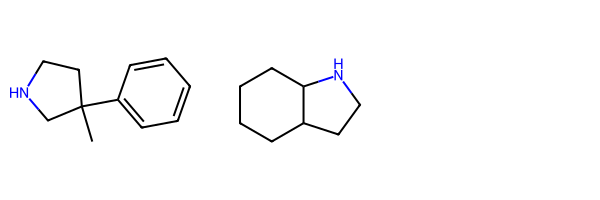

In [24]:
# substructures = [
#     Chem.MolFromSmarts(aohi["pseudo-aohi"]),
#     Chem.MolFromSmiles(aohi["ohi"])
# ]
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in aohi.values()])

In [ ]:
def contain_scaffold(mol):
    pattern1 = mol.HasSubstructMatch(Chem.MolFromSmiles(aohi["pseudo-aohi"]))
    params = Chem.SubstructMatchParameters()
    params.aromaticMatchesSingleOrDouble = True
    pattern2 = mol.HasSubstructMatch(Chem.MolFromSmiles(aohi["ohi"]), params)
    if pattern1 and pattern2:
        return True
    return False

In [ ]:
have_scaffold = np.zeros(len(alkaloids))
for i, smi in enumerate(alkaloids["smiles"]):
    mol = Chem.MolFromSmiles(smi)
    if contain_scaffold(mol):
        have_scaffold[i] = 1

alkaloids["have_aryloctahydroindole"] = have_scaffold

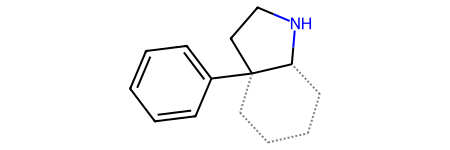

In [54]:
query = Chem.MolFromSmiles("C1=CC=C(C23~C~C~C~C~C2NCC3)C=C1")
query

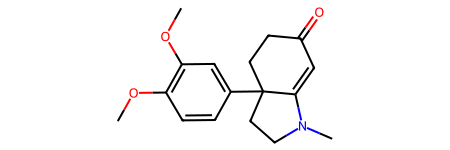

In [52]:
mol = Chem.MolFromSmiles(tmp.iloc[2]["smiles"])
mol

In [55]:
mol.HasSubstructMatch(query)

True

In [57]:
def contain_general_substructure(mol):
    # params = Chem.SubstructMatchParameters()
    # params.aromaticMatchesSingleOrDouble = True
    pattern = mol.HasSubstructMatch(Chem.MolFromSmiles(aohi["aohi"]))
    if pattern:
        return True
    return False

In [58]:
have_substructure = np.zeros(len(alkaloids))
for i, smi in enumerate(alkaloids["smiles"]):
    mol = Chem.MolFromSmiles(smi)
    if contain_general_substructure(mol):
        have_substructure[i] = 1

alkaloids["have_substructure"] = have_substructure

In [59]:
alkaloids

,ID,smiles,new_set,have_aryloctahydroindole,have_substructure
3002,CHEMBL1169873,COC1C=C[C@]23c4cc5c(cc4C(O)N(CC2O)C3C1)OCO5,Amaryllidaceae,0.0,1.0
3175,CHEMBL1172415,CC(=O)OC1C=C2CCN3C(=O)c4cc5c(cc4C(C1OC(C)=O)C2...,Amaryllidaceae,0.0,0.0
3219,CHEMBL1172810,COC1C=C[C@@]23c4cc5c(cc4CN(CC2O)C3C1)OCO5,Amaryllidaceae,0.0,1.0
3228,CHEMBL1172881,COC1C=C[C@@]23c4cc5c(cc4C(O)N(CC2O)C3C1)OCO5,Amaryllidaceae,0.0,1.0
3230,CHEMBL1172893,COc1cc2c(cc1OC)C1C(O)C(OC)C=C3CCN(C2)C31,Amaryllidaceae,0.0,0.0
...,...,...,...,...,...
22,23,CCOC(=O)N1CC[C@@]2(c3ccc(OC)c(OC)c3)Cc3nc4ccc(...,pseudoNPs,1.0,1.0
23,24,CCOC(=O)N1CC[C@@]2(c3ccc(OC)c(OC)c3)Cc3nccc(C)...,pseudoNPs,1.0,1.0
24,25,CCOC(=O)N1CC[C@@]2(c3ccc(OC)c(OC)c3)Cc3nccc(-c...,pseudoNPs,1.0,1.0
25,26,CCOC(=O)N1CC[C@@]2(c3ccc(OC)c(OC)c3)Cc3ncccc3C...,pseudoNPs,1.0,1.0


In [28]:
for n, group in alkaloids.groupby("new_set"):
    print(n, group["have_aryloctahydroindole"].sum(), len(group))

Amaryllidaceae 0.0 107
Hasubanan 118.0 118
MIAs 235.0 1049
Sceletium 6.0 15
pseudoNPs 27.0 27


In [60]:
for n, group in alkaloids.groupby("new_set"):
    print(n, group["have_substructure"].sum(), len(group))

Amaryllidaceae 36.0 107
Hasubanan 118.0 118
MIAs 176.0 1049
Sceletium 15.0 15
pseudoNPs 27.0 27


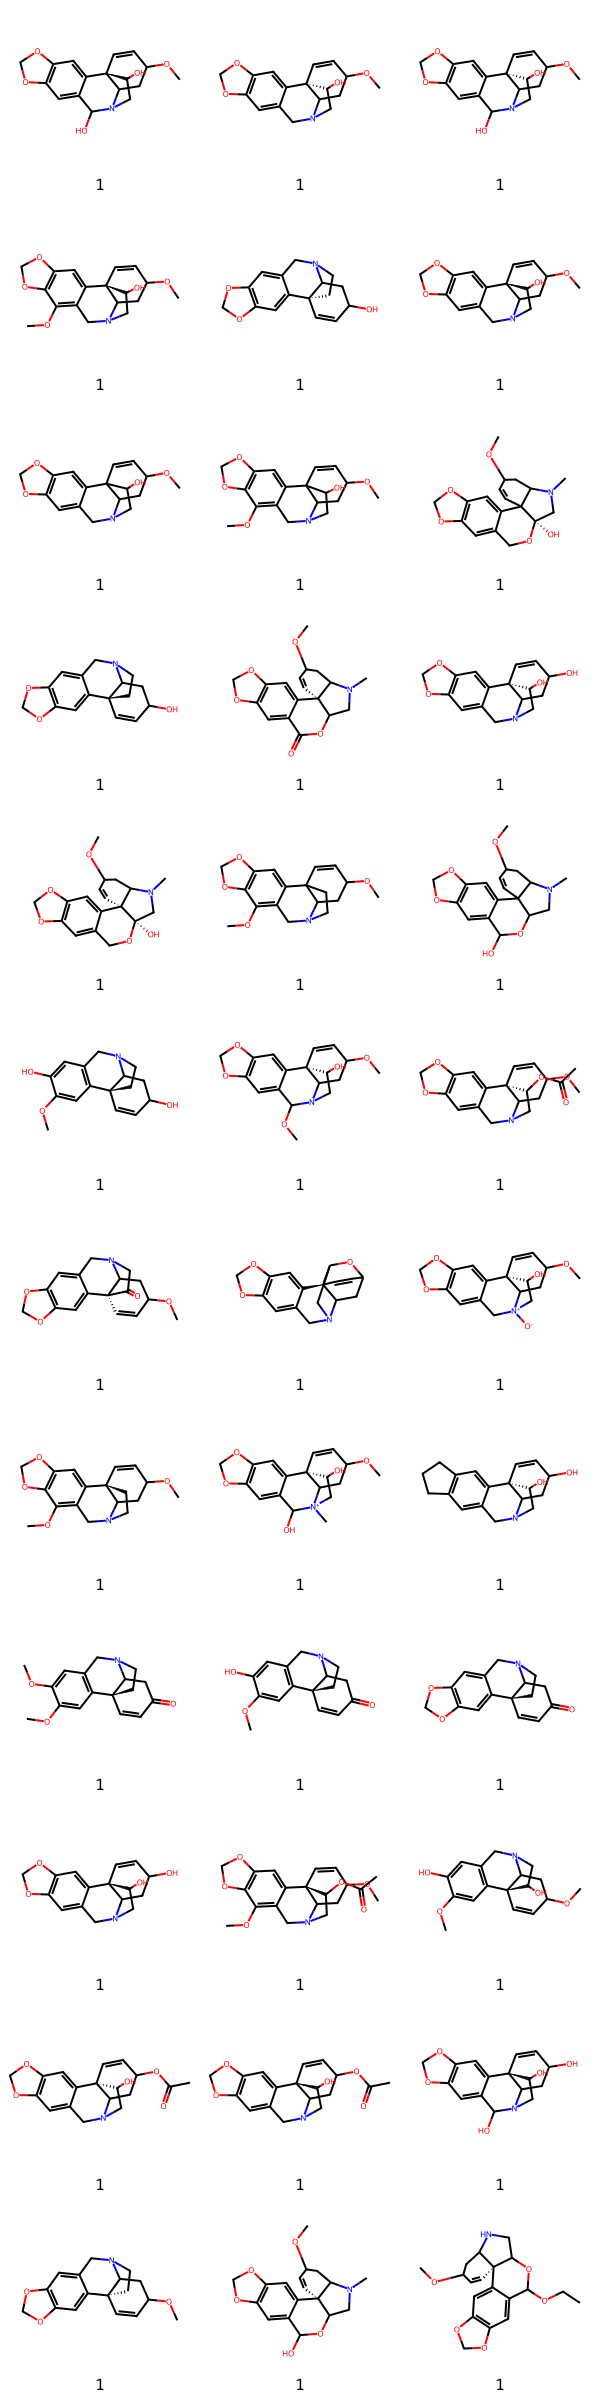

In [62]:
tmp = alkaloids.query("new_set == 'Amaryllidaceae' and have_substructure == 1")
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in tmp["smiles"]],
                     legends=[str(int(i)) for i in tmp["have_substructure"]])

In [64]:
tmp2 = alkaloids.query("new_set == 'MIAs' and (have_substructure == 1 or have_aryloctahydroindole == 1)")
# Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in tmp["smiles"]],
#                      legends=[str(int(i)) for i in tmp["have_substructure"]])

In [67]:
tmp2.shape

(235, 5)

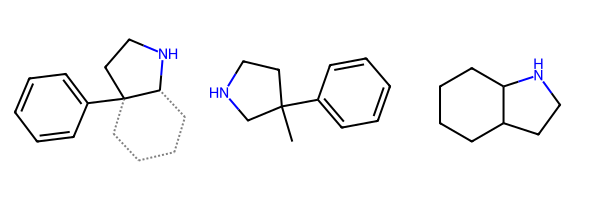

In [69]:
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in aohi.values()])

/home/f.bernal/miniconda3/envs/2025_greiner_pseudo-np/lib/python3.12/site-packages/rdkit/Chem/Draw/IPythonConsole.py:343: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


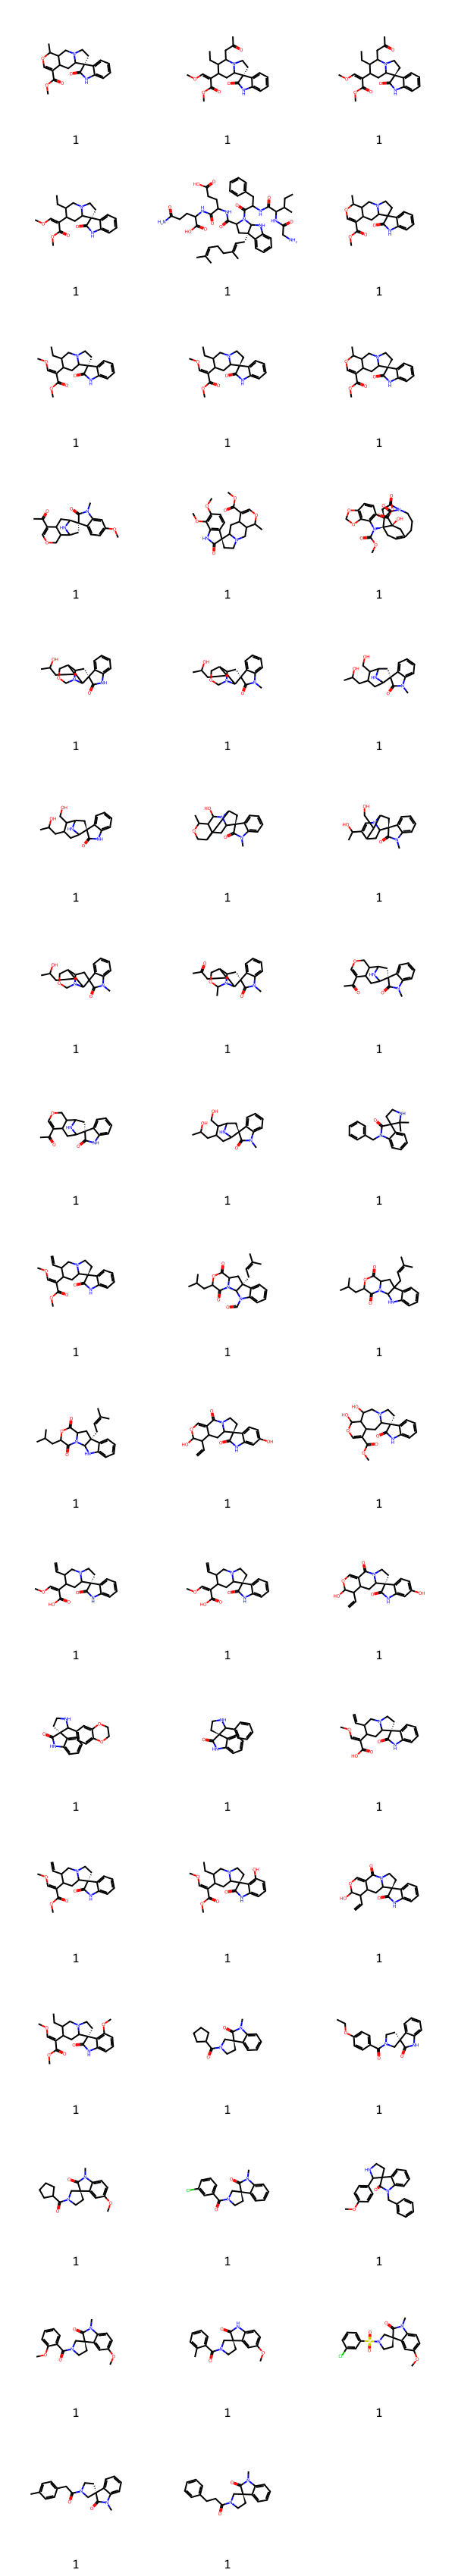

In [68]:
tmp3 = tmp2.query("have_substructure == 0")
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in tmp3["smiles"]],
                     legends=[str(int(i)) for i in tmp3["have_aryloctahydroindole"]])

/home/f.bernal/miniconda3/envs/2025_greiner_pseudo-np/lib/python3.12/site-packages/rdkit/Chem/Draw/IPythonConsole.py:343: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


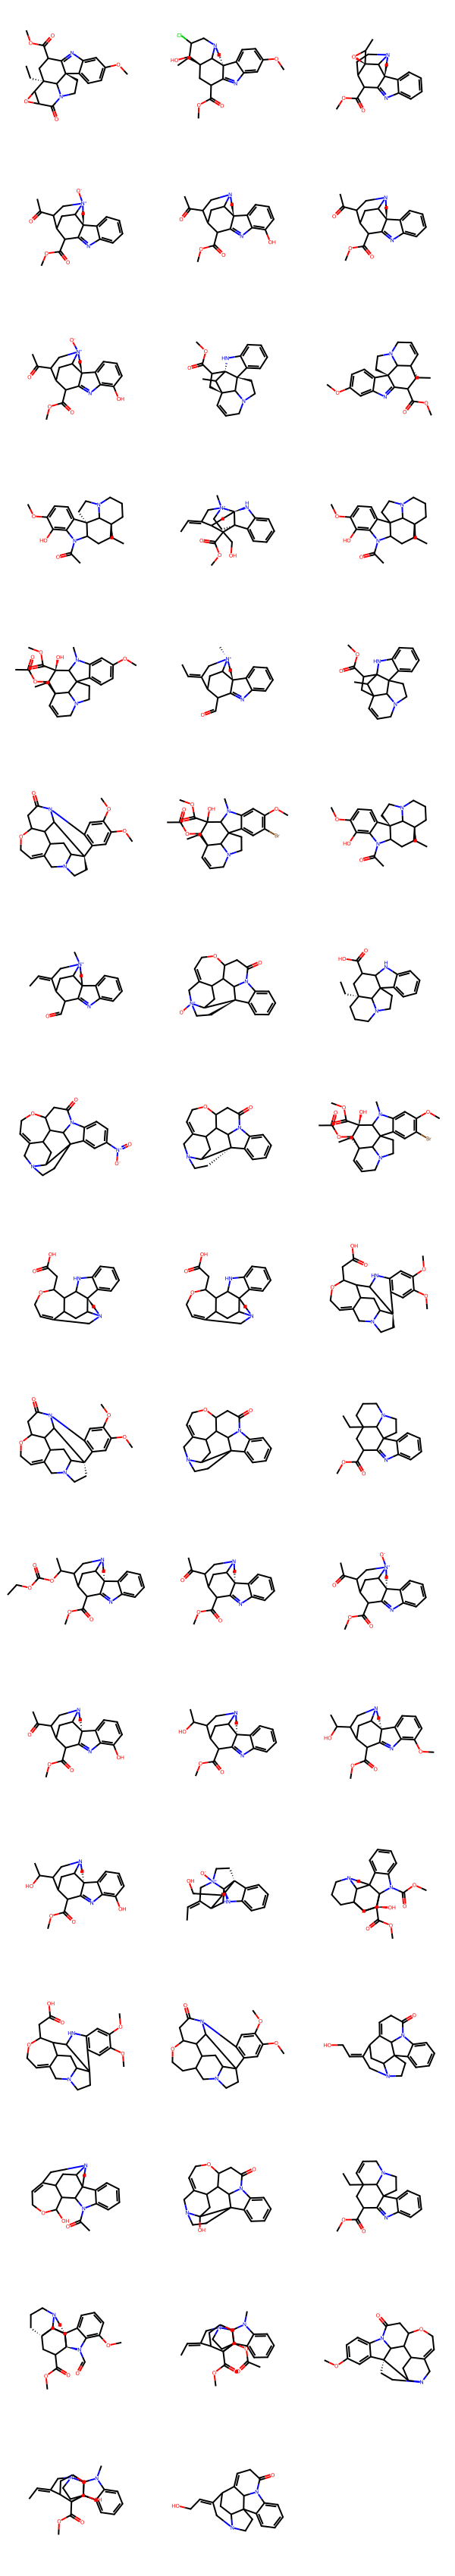

In [70]:
tmp4 = tmp2.query("have_substructure == 1")
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in tmp4["smiles"]])

In [71]:
alkaloids.to_csv(HERE / "data" / "interim" / "alkaloids.csv", index=False)